In [9]:
%matplotlib inline

# Load images and crop it


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import crop
from skimage import transform
import pydicom
from pydicom.data import get_testdata_files
#import sys
import glob
import os

os.chdir('/Users/maigva/Documents/Notebooks/datosCRX/scans')
#os.chdir('/Users/maigva/Documents/covid_subjects')
# load the DICOM files.... esta parte se tiene que acoplar a la estructura de directorios de ficheros en XNAT

# list_files=glob.glob('*/**/**/**/**/**/**/*.dcm')

list_files=glob.glob('*/**/*.dcm')
files = []

for fname in (list_files):
    files.append(pydicom.dcmread(fname))

#### Preguntar para este ejemplo por un determinado portatil, pero mejor preguntar (0028, 0301) Burned In Annotation CS: 'YES'

In [11]:
print(files[0][0x0008, 0x1090])
print(files[0][0x0028, 0x0301])

(0008, 1090) Manufacturer's Model Name           LO: 'RX_04'
(0028, 0301) Burned In Annotation                CS: 'YES'


### Disponemos de conjunto de imagenes algunas identificadas y otras no

file count: 4


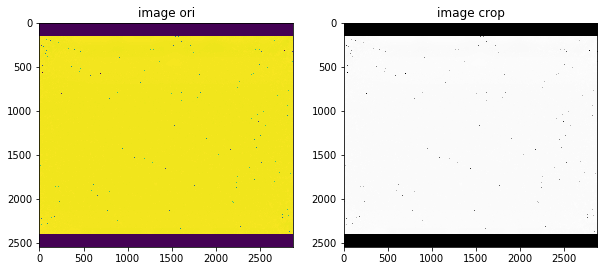

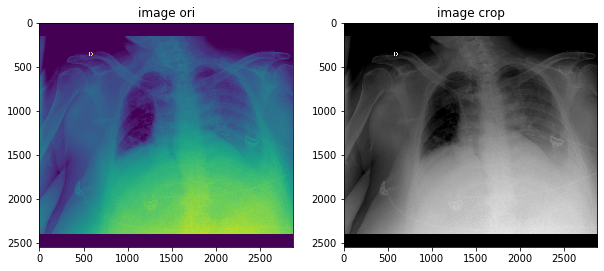

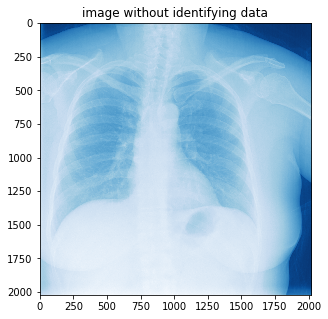

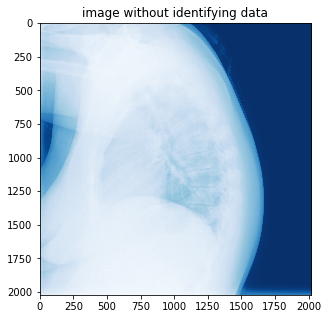

In [13]:
print("file count: {}".format(len(files)))

for i, s in enumerate(files):
    if (s[0x0008, 0x1090].value=="RX_04" or s[0x0028, 0x0301].value=="YES"):
        img2d_list = s.pixel_array
        
        # img2d_list = np.asarray(s.PixelData)
        (y,x)= s.pixel_array.shape
        a = np.zeros((150,x))
        c = np.zeros((150,x))
        b = np.ones((y-300,x))
        d= np.concatenate((a,b,c), axis = 0)
        e = d*img2d_list
        s.PixelData = e.astype(np.uint16).tostring() # esta línea es la clave para guardar en dcm
        
        #2.- guardarlo en disco
        s.save_as('/Users/maigva/Desktop/out.png')
        # imprimir solo para verificar resultados
        fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize =(10,10))
        ax1.set_title('image ori')
        ax1.imshow(img2d_list)
        ax2.set_title('image crop')
        ax2.imshow(e, cmap='gray')
    else:
        fig3,(ax1)= plt.subplots(ncols=1, nrows=1, figsize =(5,5))
        ax1.set_title('image without identifying data')
        ax1.imshow(files[i].pixel_array, cmap ='Blues_r')
        
